
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E03_overfit_regularization.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Overfit and regularization exercises 

---
These are introductory exercises in Machine learning with focus in **overfitting and regularization** .

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Tips data EDA (*)

In the whole exercise, we will work with the "tips" dataset from seaborn dataset. Start by loading dataset "tips" from the ```load_dataset``` method in seaborn module. The goal will be to use polynomial linear regression to predict tips. 

&nbsp; a) Start by doing some initial EDA such as info(), describe().

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. Plot the descriptive statistics for each numerical column, with a adequate plot type (e.g. barplot).

&nbsp; c) Based on the initial EDA, make some more plots on things you think could be worthwhile to investigate. 

&nbsp; d) Try discuss your findings with yourself/colleague and draw some conclusions if possible. Note that in reality, it is important to be able to communicate your findings so that other people in your team/customers/stakeholders etc. get an understanding of the data and realizes the importance of your role as a data scientist/analyst.

<details>

<summary>Answer</summary>


b)
<img src="../assets/df_describe.png" height="300"/>

c) Here are some example plots

<img src="../assets/tips_EDA.png" height="300"/>

<img src="../assets/tips_smoke_sex.png" width="500"/>

<img src="../assets/tips_bar_sex.png" width="300"/>


d) For example: 
- there are almost double amount of females represented in the dataset
- there are very few tables with 1 person eating, and they usually give very low tip
- female and male tip somewhat similar

</details>

---

In [1029]:
import seaborn as sns
tips = sns.load_dataset("tips")
import matplotlib.pyplot as plt

# tips
# tips.info()
# tips.describe().map(lambda x: f"{x:.2f}")
# tips[["tip","total_bill","size"]].corr()


In [1030]:
# Converint Categorical to Integier
# print( tips.columns ) 
# print( tips["sex"].unique() )
# print( tips["smoker"].unique() )
# print( tips["time"].unique() )
# print( tips["day"].unique() )
# tips_int = tips.copy(deep=True) 
# tips_int["sex"] = tips_int["sex"].map(lambda x: 0 if x=="Female" else 1).astype(int)
# tips_int["smoker"] = tips_int["smoker"].map(lambda x: 0 if x=="No" else 1).astype(int)
# tips_int["time"] = tips_int["time"].map(lambda x: 0 if x=="Dinner" else 1).astype(int)
# tips_int["day"] = tips_int["day"].map(lambda x: {"Thur":1, "Fri":2, "Sat":3, "Sun":4}[x]).astype(int)

# print( tips_int["sex"].unique() )
# print( tips_int["smoker"].unique() )
# print( tips_int["time"].unique() )
# print( tips_int["day"].unique() )





In [1031]:
#sns.pairplot(tips_int[["total_bill","day"]], corner=True, height=2)

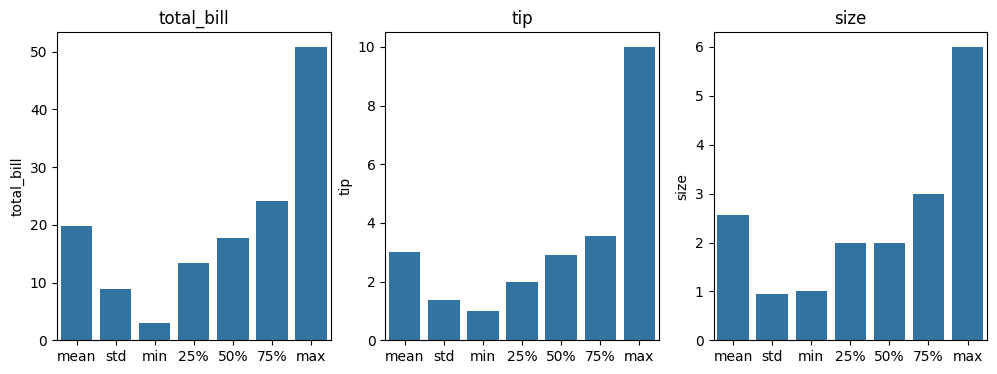

In [1032]:
# Descriptive 
li = ["total_bill", "tip", "size"]
data = lambda li, idx: tips[li[idx]].describe().drop("count")
n = len(li)

fig, ax = plt.subplots(1, n, figsize=(12,4), dpi=100) 
for idx in range(n):
    sns.barplot(data=data(li, idx), ax=ax[idx]) 
    ax[idx].set(title=f"{li[idx]}" )




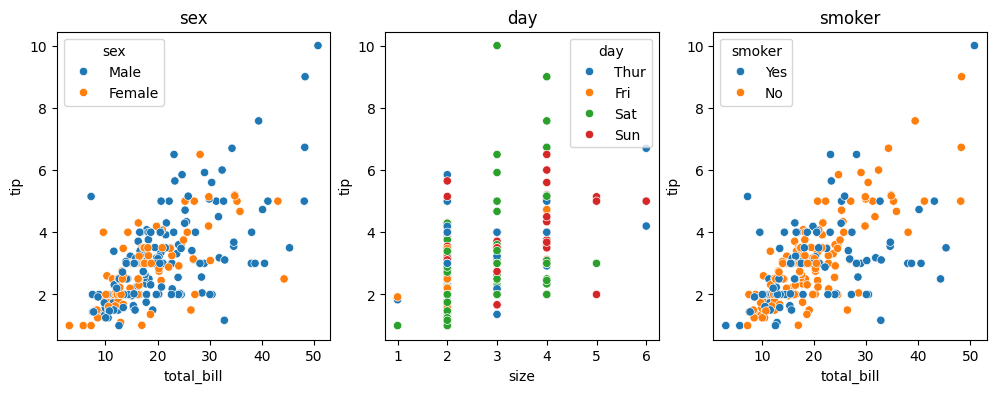

In [1033]:
# Scatter 
li = ["sex", "day", "smoker"]
li2 = ["total_bill", "size", "total_bill"] 
# data = lambda li, idx: tips[li[idx]].describe().drop("count")
n = len(li)

fig, ax = plt.subplots(1, n, figsize=(12,4), dpi=100) 
for idx in range(n):
    sns.scatterplot(data=tips, x=li2[idx], y="tip", hue=li[idx], ax=ax[idx]) 
    ax[idx].set(title=f"{li[idx]}" )


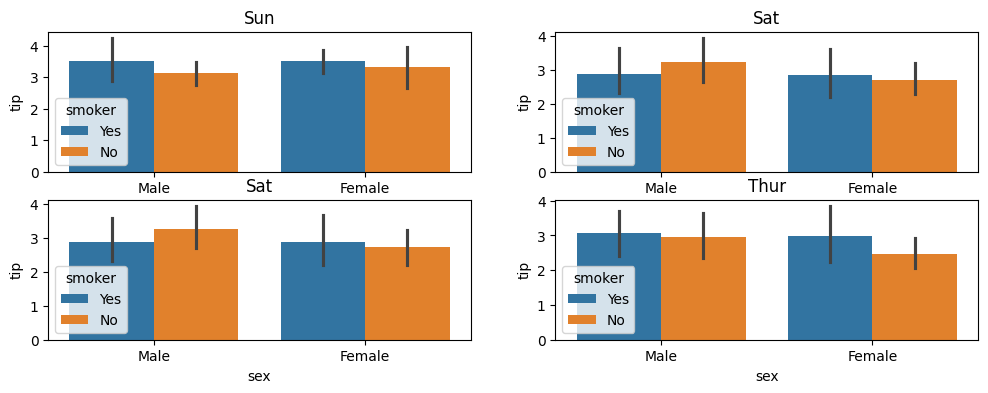

In [1034]:
# Bar Week  
li = ["Sun", "Sat", "Thur", "Fri"]
data = lambda li, idx: tips[ tips["day"]==li[idx] ]
n = int(len(li)/2)

fig, ax = plt.subplots(2, 2, figsize=(12,4), dpi=100) 
for idx in range(n):
    for idy in range(n):
        sns.barplot(data=data(li, idx+idy),  x="sex", y="tip", hue="smoker", ax=ax[idx][idy]) 
        ax[idx][idy].set(title=f"{li[idx+idy]}" )

#tips.day
#tips[tips["day"]=="Fri"]

<Axes: xlabel='sex', ylabel='tip'>

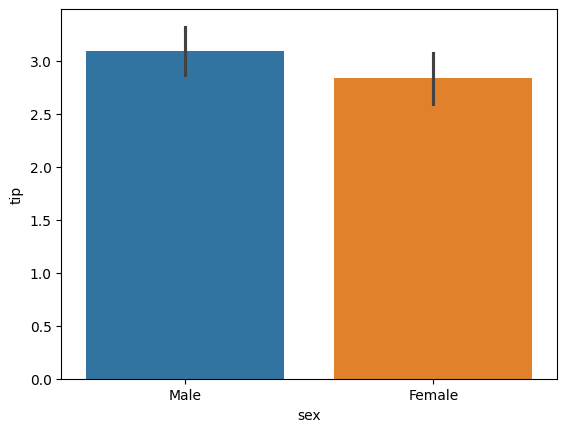

In [1035]:
sns.barplot(data=tips,  x="sex", y="tip", hue="sex") 

## 1. Train|test split (*)

Split the data into training part and testing part, using sklearn's train_test_split with test size of 0.3 and random_state 42.

In [1036]:
from sklearn.model_selection import train_test_split
import numpy as np
# I should technically check i there is a correlation between total_bill and size
# if there is I should probably remove one of them
#X = np.column_stack([ np.ones(tips.shape[0]),tips[["total_bill","size"]] ]) 
X = tips[["total_bill","size"]]
y = tips["tip"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.3, random_state=42) 

X_train.shape,  X_test.shape, y_train.shape, y_test.shape

((170, 2), (74, 2), (170,), (74,))

---
## 2. Feature standardization (*)

We need to normalize the data and in this case will be using feature standardization. Implement this yourself following this formula:

$$X_{train}' = \frac{X_{train}-\mu_{train}}{\sigma_{train}}$$

$$X_{test}' = \frac{X_{test}-\mu_{train}}{\sigma_{train}}$$

, where $'$ denotes scaled, $\mu_{train}$ is the mean of the training data, $\sigma_{train}$ is the standard deviation of the training data. Note that it is very important that the mean and standard deviation is computed from the training data and not from testing data to avoid data leakage. Control the standard deviation and mean of $X_{train}'$ and $X_{test}'$. Is the results as you expect, why, why not?

<details>

<summary>Answer</summary>

scaled_X_train (total_bill, size) mean: [ 6.79195262e-17 -1.98534000e-16]

scaled_X_test (total_bill, size) mean: [-0.19137999 -0.04477934]

scaled_X_train (total_bill, size) std: [1. 1.]

scaled_X_test (total_bill, size) std: [0.92495673 1.06638889]

</details>

In [1037]:
X_train.shape,y_train.shape

((170, 2), (170,))

In [1038]:
# Note that this is the first time we make an OLS without first adding the intercerpt
# But it doesn't seeem to work, I need to get the STD some how
#ols = lambda X, y : np.linalg.pinv(X.T @ X) @ X.T @ y 
#b = ols(X_train["total_bill"], y_train).values
#y_hat = X_train["total_bill"]@b
#SSE = sum(y_train-y_hat)**2
#(y_train-(sum(X_train)/X_train.shape[0]))/np.sqrt(SSE)
#np.sqrt(SSE)
#result = (X_train - sum(X_train)/X_train.shape[0]) / np.sqrt(SSE)

#result["total_bill"].mean()
#np.mean(result[:,1])

X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_test_mean = X_test.mean()
X_test_std = X_test.std()

X_train_scaled = (X_train - X_train_mean) / X_train_std
X_test_scaled = (X_test - X_train_mean) / X_train_std
print( f"Scaled X Train Mean (total_bill, size): [{X_train_scaled["total_bill"].mean(), X_train_scaled["size"].mean(),}]" )
print( f"Scaled X Train STD  (total_bill, size): [{X_train_scaled["total_bill"].std():.0f}, {X_train_scaled["size"].std():.0f}]" )
print( f"Scaled X  Test Mean (total_bill, size): [{X_test_scaled["total_bill"].mean(), X_test_scaled["size"].mean(),}]" )
print( f"Scaled X  Test STD  (total_bill, size): [{X_test_scaled["total_bill"].std():.8f}, {X_test_scaled["size"].std():.8f}]" )



Scaled X Train Mean (total_bill, size): [(6.791952621236252e-17, -1.9853399969767506e-16)]
Scaled X Train STD  (total_bill, size): [1, 1]
Scaled X  Test Mean (total_bill, size): [(-0.19137999314331822, -0.044779343239090774)]
Scaled X  Test STD  (total_bill, size): [0.92495673, 1.06638889]


---
## 3. Polynomial features (*)

We want to investigate ```Polynomialfeatures``` from scikit-klearn in this task. Start by instantiating an object of type ```PolynomialFeatures``` with degree 2. Now do the following: 

- use the method fit on $X_{train}'$
- transform $X_{train}'$
- transform $X_{test}'$

Compare this transformed $X_{test}'$ with $X_{test}''$ where $X_{test}''$ comes from fitting the polynomial features to $X_{test}'$ and transforming $X_{test}'$. You can check directly by using ```==``` and then sum it up. If the value is same as the length, then you know that they are the same, as a boolean True evaluates to 1. 


In [1039]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Model is not part of the exercise
# Fit adds the intercept so you don't need to to a columnstack before nor after the split
model = LinearRegression()
model.fit(X_train_scaled, y_train)
# Note that only LinearRegression .fit have the intercept_ and coef_ methods, 
# PolynomialFeatures .fit_transform are raw narrays 
model.intercept_, model.coef_ 


# Why don't I include the bias?
poly = PolynomialFeatures(degree = 2, include_bias=False)
X_poly_train_ft = poly.fit_transform(X_train_scaled)
X_poly_test_ft = poly.fit_transform(X_test_scaled)
X_poly_test_f = poly.transform(X_test_scaled)

print( (X_poly_test_ft == X_poly_test_f).sum() )
print( X_poly_test_ft.size )



370
370


---
## 4. Polynomial regression  (*)

We will now investigate the training loss and testing loss for different degrees of polynomial. Loop through degrees 1 to 4 (inclusive) and:
- instantiate an object of PolynomialFeatures with that degree
- fit and transform $X_{train}'$ and $X_{test}$ to create polynomial features
- perform linear regression on these polynomial features (polynomial regression)
- predict on both the training and testing data to record RMSE for training and testing for each iteration of the loop

Now plot the results in the same figure. Do you notice anything special? 

<details>

<summary>Answer</summary>

<img src="../assets/E3_overfitting.png" height="300"/>

</details>

[Text(0.5, 1.0, 'RMSE for training and test data'),
 Text(0.5, 0, 'Polynomial Degree'),
 Text(0, 0.5, 'RMSE')]

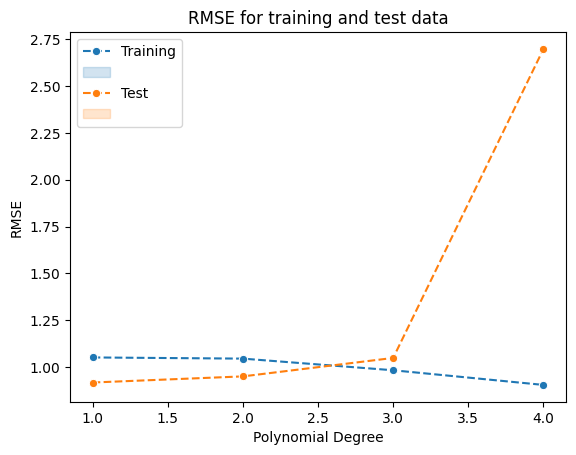

In [1040]:
import pandas as pd

def RMSE(y, y_hat):
    MSE  = np.divide(1, len(y)) * np.sum( np.abs(y - y_hat)**2 )
    return np.sqrt(MSE)

scale = lambda X: (X - X.mean()) / X.std()

X = tips[["total_bill","size"]]
X = np.column_stack([ np.ones(tips.shape[0]), X]) 
X = scale(X)
y = tips["tip"]

test = list() 
train = list()

Xtr, Xte, ytr, yte = train_test_split( X, y, test_size=.3, random_state=42 )

# Needs to be in a function for som reason
# if you remove the function it doesn't work
def polynomial_regression(degree, Xtr, Xte, ytr, yte):
    poly = PolynomialFeatures(degree = i, include_bias=False)
    Xtr = poly.fit_transform(Xtr)
    Xte = poly.transform(Xte)

    model = LinearRegression()
    model.fit(Xtr, ytr)
    yte_hat = model.predict(Xte)
    ytr_hat = model.predict(Xtr)

    return RMSE(yte, yte_hat), RMSE(ytr, ytr_hat)



for i in range(1,5):
    RMSE_test, RMSE_train = polynomial_regression(i, Xtr, Xte, ytr, yte)
    test.append(RMSE_test)
    train.append(RMSE_train)

plot = sns.lineplot(y=train, x=range(1,len(train)+1), linestyle=("--"), marker="o")
plot = sns.lineplot(y=test, x=range(1,len(test)+1), linestyle=("--"), marker="o")
plot.legend(loc='upper left', labels=['Training', '', 'Test', ''])
plot.set(title="RMSE for training and test data", xlabel="Polynomial Degree", ylabel="RMSE")



---
## 5. Regularization methods (*)

Now we will try the regularization methods: ridge regression, lasso regression and elasticnet regression. In the following tasks, use degree = 4. 

&nbsp; a) Use ridge regression with cross-validation and test out different alpha-values. I used $\alpha=[0.01, 0.1, 0.5, 1, 5, 10]$ in the cross-validation. 
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

&nbsp; b) Use lasso regression with cross-validation and choose number of alphas to 100. If you get a warning that the algorithm is not converging, increase the max iterations, I chose 10000 iterations. 
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

&nbsp; c) Use elasticnet regression with cross-validation and choose number of alphas to 100. If you get a warning that the algorithm is not converging, increase the max iterations, I chose 10000 iterations. Choose a set of $\ell_1$ ratios for it to try out. I chose $\ell_1 = [.001, .01, .05, .1, .5, .9, .95, 1]$
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

<details>

<summary>Answer</summary>

a) 

Chosen alpha from cross-validation 5.0

Weights: [ 0.          0.91469637  0.23893931 -0.67583593  0.20550801 -0.01369317
 -0.26007685  0.31867863 -0.03429744 -0.12484035  0.16000319 -0.18105113
  0.24878399 -0.12692847  0.05002613]

Mean absolute error: 0.831

Mean squared error: 2.208

Root mean squared error: 1.486

b) 

Chosen alpha from cross-validation 0.208

Weights: [ 0.          0.23469707  0.         -0.         -0.          0.
  0.08814685  0.09735986  0.          0.03219702  0.          0.
  0.         -0.          0.        ]

Mean absolute error: 0.823

Mean squared error: 1.345

Root mean squared error: 1.160

c)

Chosen alpha from cross-validation 0.107

Mean absolute error: 0.761

Root mean squared error: 1.139

L1_ratio: 0.9

Weights: [ 0.          0.23469707  0.         -0.         -0.          0.
  0.08814685  0.09735986  0.          0.03219702  0.          0.
  0.         -0.          0.        ]


</details>

In [1041]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def build_tests(y, y_hat):
    MSE = mean_squared_error(y, y_hat)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y, y_hat)
    return MSE, RMSE, MAE

In [1042]:
def print_all(alpha, weights, MSE, RMSE, MAE):
    print( f"Chosen alpha from cross-validation {alpha}")
    print( f"weights: {weights}" ) 
    print(f"Mean absolute error: {MAE}")
    print(f"Mean squared error: {MSE}")
    print(f"Root mean absolute error: {RMSE}")

In [1043]:

def split_scale(df, X_columns, y_column):
    y = df[y_column]
    X = df[X_columns]
    
    # Old scale, I don't know if you can scale before the split 
    # but if you can't than this won't work
    # scale = lambda X:(X - X.mean()) / X.std()
    # X = scale(X) # Scale Before Split 

    # Not sure why we don't use columnstack
    # X = np.column_stack([ np.ones(tips.shape[0]), X])  # Stack

    # split
    Xtr, Xte, ytr, yte = train_test_split( X, y, test_size=.3, random_state=42 ) # Split
   
    #scale
    scale = lambda Xtr, Xte: ( (Xtr-Xtr.mean())/Xtr.std(), (Xte-Xtr.mean())/Xtr.std() ) 
    Xtr, Xte = scale(Xtr, Xte)
       
    return Xtr, Xte, ytr, yte




In [1044]:
# Ridge Setup
tips = sns.load_dataset("tips")
Xtr, Xte, ytr, yte = split_scale(tips, ["total_bill","size",], "tip")
poly = PolynomialFeatures(degree = 4, include_bias=False)
Xtr = poly.fit_transform(Xtr)
Xte = poly.transform(Xte)

In [1045]:
# Ridge Alpha
from sklearn.linear_model import RidgeCV # ridge regression with cross-validation
# negative because sklearn uses convention of higher return values are better
model_ridgeCV = RidgeCV(alphas = [.0001, .001, .01, .1, .5, 1, 5, 10], scoring = "neg_mean_squared_error")
model_ridgeCV.fit(Xtr, ytr)
print(model_ridgeCV.alpha_)

5.0


In [1046]:
# Ridge
from sklearn.linear_model import Ridge

def ridge_regression(Xte, Xtr, ytr, penalty):
    # alpha = 0 should give linear regression
    # note that alhpa is same as lambda in theory, i.e. penalty term. sklearn has chosen alpha to generalize their API
    model_ridge = Ridge(alpha = penalty)
    model_ridge.fit(Xtr, ytr)
    y_hat = model_ridge.predict(Xte)
    weights = model_ridge.coef_
    return y_hat, model_ridge.coef_

y_hat, weights = ridge_regression(Xte, Xtr, ytr, penalty=model_ridgeCV.alpha_)
MSE, RMSE, MAE = build_tests(yte, y_hat)
alpha = model_ridgeCV.alpha_


print_all(alpha, weights, MSE, RMSE, MAE)

Chosen alpha from cross-validation 5.0
weights: [ 0.9147   0.23894 -0.67584  0.20551 -0.01369 -0.26008  0.31868 -0.0343
 -0.12484  0.16    -0.18105  0.24878 -0.12693  0.05003]
Mean absolute error: 0.8305665867404404
Mean squared error: 2.207528610269178
Root mean absolute error: 1.4857754239013303


In [1047]:
# Lasso Setup
tips = sns.load_dataset("tips")
Xtr, Xte, ytr, yte = split_scale(tips, ["total_bill","size",], "tip")
poly = PolynomialFeatures(degree = 4, include_bias=False)
Xtr = poly.fit_transform(Xtr)
Xte = poly.transform(Xte)

In [1048]:
# Lasso
from sklearn.linear_model import LassoCV

# it is trying 100 different alphas along regularization path epsilon
model_lassoCV = LassoCV(eps = 0.001, n_alphas = 100, max_iter=10000, cv=5)
model_lassoCV.fit(Xtr, ytr)

alpha = model_lassoCV.alpha_
y_hat = model_lassoCV.predict(Xte)
weights = model_lassoCV.coef_

MSE, RMSE, MAE = build_tests(yte, y_hat)

print_all(alpha, weights, MSE, RMSE, MAE)

Chosen alpha from cross-validation 0.20770232166587632
weights: [ 0.2347   0.      -0.      -0.       0.       0.08815  0.09736  0.
  0.0322   0.       0.       0.      -0.       0.     ]
Mean absolute error: 0.8233993502433836
Mean squared error: 1.3451967151343822
Root mean absolute error: 1.159826157290127


In [1049]:
# Elastic Net Setup
tips = sns.load_dataset("tips")
Xtr, Xte, ytr, yte = split_scale(tips, ["total_bill","size",], "tip")
poly = PolynomialFeatures(degree = 4, include_bias=False)
Xtr = poly.fit_transform(Xtr)
Xte = poly.transform(Xte)

In [1050]:
# Elastic Net
from sklearn.linear_model import ElasticNetCV

# note that alpha here is lambda in the theory
# l1_ratio is alpha in the theory
model_elastic = ElasticNetCV(l1_ratio=[.001, .01, .05, .1, .5, .9, .95, 1], eps = 0.001, n_alphas = 100, max_iter=10000)
model_elastic.fit(Xtr, ytr)
y_hat = model_elastic.predict(Xte)

alpha = model_elastic.alpha_
weights = model_elastic.coef_
L1 = model_elastic.l1_ratio_ # this would remove ridge and pick Lasso regression entirely


MSE, RMSE, MAE = build_tests(yte, y_hat)
print_all(alpha, weights, MSE, RMSE, MAE)
print(f"l1 ratio: {L1}") 

Chosen alpha from cross-validation 0.10711875299553128
weights: [ 0.51937  0.09959 -0.21442  0.       0.       0.       0.11409  0.
  0.01801  0.03755  0.       0.       0.       0.     ]
Mean absolute error: 0.7608143757323664
Mean squared error: 1.298344688539288
Root mean absolute error: 1.1394492917805898
l1 ratio: 0.9


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---